## 4. Sum up all phase constributions for 3D raw phase time-series ##

In [1]:
## Simulate 3D raw phase time-series by summing up all the components
%matplotlib inline
import os
import numpy as np
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, writefile
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Documents/Paper/2019_MintPy/figs_src/phaseCorrection_order')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

# reference timeseries file for temp/perp baselines
proj_dir = os.path.expanduser('~/data/Galapagos/AlcedoSenDT128/mintpy')
sensorName = sensor.project_name2sensor_name(proj_dir)[0]
ref_file   = os.path.join(proj_dir, 'timeseries.h5')
ts_obj = timeseries(ref_file)
ts_obj.open()
num_date = ts_obj.numDate
length = ts_obj.length
width = ts_obj.width

# components
merra_file = os.path.join(proj_dir, 'inputs/MERRA.h5')
ramp_file  = os.path.join(proj_dir, 'ramp.h5')

sim_turb_file = os.path.join(work_dir, 'sim_tropoTurbulence.h5')
sim_defo_file = os.path.join(work_dir, 'sim_displacement.h5')
sim_topo_file = os.path.join(work_dir, 'sim_topoResid.h5')

Go to directory: /Users/yunjunz/Documents/Paper/2019_MintPy/figs_src/phaseCorrection_order
open timeseries file: timeseries.h5


In [2]:
# 3D raw phase time-series
out_file = 'timeseries.h5'
if not os.path.isfile(out_file):
    ts_data = np.zeros((num_date, length, width), dtype=np.float32)
    for fname in [merra_file, sim_turb_file, sim_topo_file, ramp_file, sim_defo_file]:
        print('reading time-series data from file', os.path.basename(fname))
        data = readfile.read(fname)[0]
        data -= np.tile(data[0,:,:], (num_date, 1, 1))
        ts_data += data
    # write to file
    writefile.write(ts_data, out_file=out_file, ref_file=ref_file, compression='lzf')
    print('write simulated raw phase time-series to file', out_file)
print('Done.')

reading time-series data from file MERRA.h5
reading time-series data from file sim_tropoTurbulence.h5
reading time-series data from file sim_topoResid.h5
reading time-series data from file ramp.h5
reading time-series data from file sim_displacement.h5
create timeseries HDF5 file: timeseries.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to timeseries.h5
write simulated raw phase time-series to file timeseries.h5
Done.


run view.py in MintPy release version v1.2beta-72, release date 2019-12-27
input file is timeseries file: /Users/yunjunz/Documents/Paper/2019_MintPy/figs_src/phaseCorrection_order/timeseries.h5 in float32 format
file size in y/x: (646, 729)
num of datasets in file timeseries.h5: 98
datasets to exclude (0):
[]
datasets to display (98):
['timeseries-20141213', 'timeseries-20141225', 'timeseries-20150307', 'timeseries-20150319', 'timeseries-20150331', 'timeseries-20150412', 'timeseries-20150424', 'timeseries-20150506', 'timeseries-20150518', 'timeseries-20150530', 'timeseries-20150611', 'timeseries-20150623', 'timeseries-20150717', 'timeseries-20150729', 'timeseries-20150822', 'timeseries-20150903', 'timeseries-20150915', 'timeseries-20150927', 'timeseries-20151009', 'timeseries-20151021', 'timeseries-20151102', 'timeseries-20151114', 'timeseries-20151126', 'timeseries-20151208', 'timeseries-20151220', 'timeseries-20160101', 'timeseries-20160113', 'timeseries-20160125', 'timeseries-201602

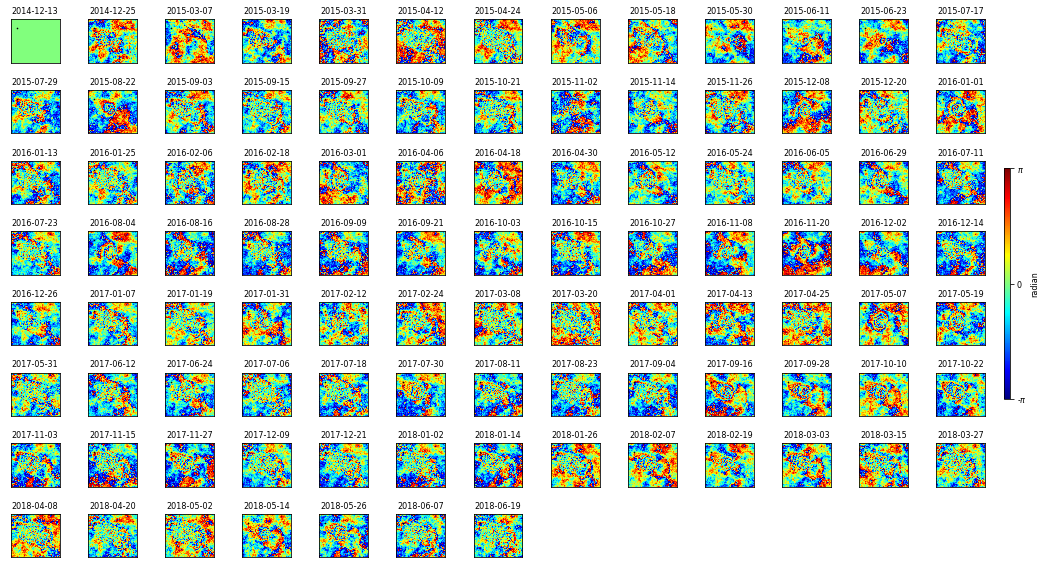

In [3]:
from mintpy import view
scp_args = ' {} --wrap '.format(out_file)
view.main(scp_args.split())